In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:

#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [5]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

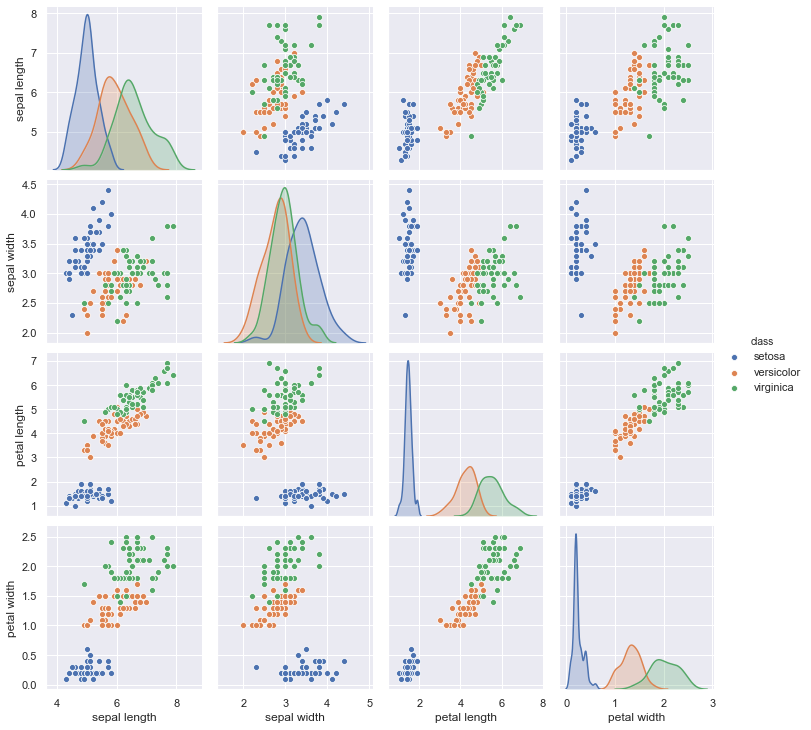

In [4]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]


#Optional: lets visualize the pairwise relationships between the features

#create the pairplot using seaborn
sns.pairplot(df.dropna(), hue='class')
plt.show()

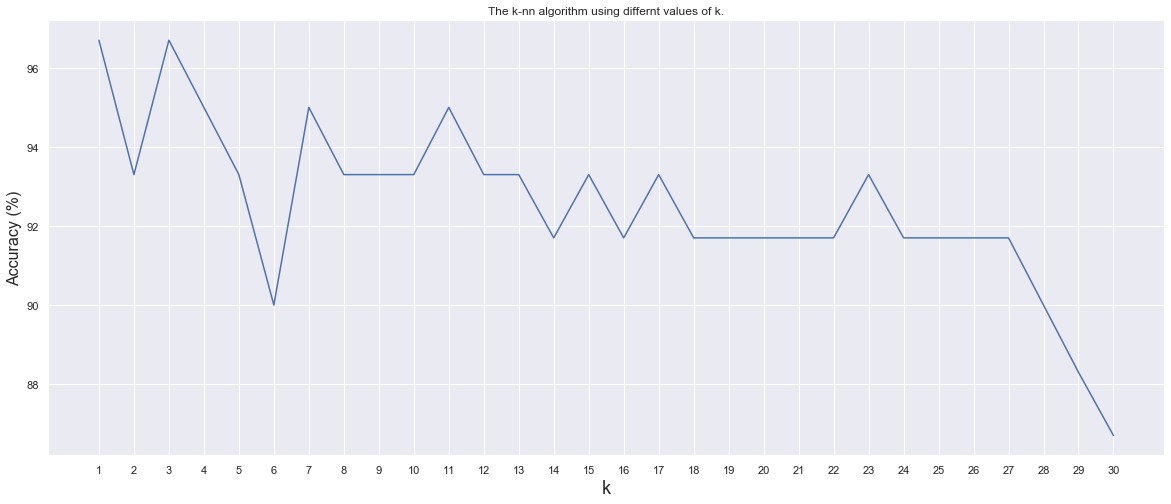

In [5]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    stratify=y, 
                                                    random_state=7) #random_state for reproducibility

#build the k-nn model using differnt values of k

k = 1        
accuracy = {}

while k < 31:
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) #train the model
    
    predictions      = knn.predict(X_test) #use the model to make predictions
    accuracy[str(k)] = round(accuracy_score(y_test, predictions), 3) * 100 #check the accuracy of the predictions using the test data
    
    k+=1

plt.rcParams['figure.figsize'] = (20,8)  
plt.title('The k-nn algorithm using differnt values of k.')
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel('k', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.show()

In [64]:

k = 11 #replace 'None' with the value of k
if k:
    target_names = data['target_names']
    knn          = KNeighborsClassifier(n_neighbors = k) 

    knn.fit(X_train, y_train) #train the model
    y_pred = knn.predict(X_test) #check the prediction using the test set

    #y_train, y_test
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.90      0.92        20
   virginica       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



After running the code that was provided, we have the ability to analyze where K was most accurate and valuable. At first glance of the line graph, the first observation that I thought was interesting was that K=1 was tied with the highest accuracy (with k = 3) while the accuracy was lowest at K=30. We know that K-NN relies on structured data and the existing labeled data that we already have at our exposure. Understanding where K can be optimized at the highest level can result in tremendous value. It will make working with the unclassified data more smoothly. K=1 having the highest accuracy and being most precise does not always showcase the data in its entirety. Personally, I would not select K=1 as the most suitable point because I do not believe one neighboring point proves much value (noise is a factor). You can see that pretty quickly as we see a drop off in accuracy when K=2. Right after that we see another spike in accuracy when K=3. To me I think it is important to look at K with a value somewhere between 5-15. I understand that it depends on how large your data is but with larger datasets, K-NN is not the most beneficial algorithm to use. I believe anything lower and higher is sensitive to noise as well as boundaries becoming too extreme as mentioned before. In this example, looking at the line graph I would select K when it is equal to 11 as the most suitable value. I am more confident using K at this value because it involves more labeled data while only being 1% less accurate than when K=1 or K=3. I think this value involves enough of the classified data we see in our data. When we revise the code and set K=11 we get a detailed chart describing results further. We see Setosa had the highest precision when compared to Versicolor and Virginica as well as recall. Precision identifies points that were most relevant while recall is the relevant points that are returned. Versicolor and Virginica were lower - an interesting thing I noticed was that precision was higher for versicolor vs virginica but vice versa when looking at recall. The weighted average as stated before was 95% and this is some of the reasoning as to why I think K=11 is most suitable. Most importantly, we want to recommend choosing a suitable value that is not computationally expensive (we always need to consider the computational aspect of analyzing data).